In [514]:



import nltk
import numpy as np
import pandas as pd
import random
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import feature_extraction, manifold
from nltk import FreqDist
import wordcloud

from sklearn.utils import resample






import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import feature_extraction, manifold
from nltk import FreqDist
import wordcloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
import seaborn as sns
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import cohen_kappa_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from __future__ import print_function
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.sklearn_api import TfIdfTransformer
import codecs
import numpy as np
import logging
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import utils
import csv
from tqdm import tqdm
import multiprocessing

from sklearn import utils
import csv
from tqdm import tqdm
import multiprocessing




In [515]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [516]:
pip install surprise

In [517]:
from datetime import datetime
import os
import pandas as pd
import numpy as np
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import SVD
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from collections import defaultdict

In [518]:
idofuser=47

In [519]:
import pandas as pd

df = pd.read_excel (r'/content/sample_data/Ratings.xlsx')
print (df.values[:,0:])

[[0 '(datetime.datetime(2018, 10, 25, 11, 26, 57), 3039.918665490173)' 7
  45055 3]
 [1 '(datetime.datetime(2018, 10, 25, 12, 26, 57), 2728.635850585089)' 40
  78355 4]
 [2 '(datetime.datetime(2018, 10, 25, 13, 26, 57), 1514.057690991042)' 32
  66029 5]
 ...
 [997 '(datetime.datetime(2018, 12, 6, 0, 26, 57), 3345.7870694513904)'
  64 70078 4]
 [998 '(datetime.datetime(2018, 12, 6, 1, 26, 57), 3414.9898782212217)'
  85 17984 1]
 [999 '(datetime.datetime(2018, 12, 6, 2, 26, 57), 1729.4851249133173)' 6
  25672 5]]


In [520]:
ratings_dict = {'userID': list(df.userid),
                'songID': list(df.songid),
                'rating': list(df.rating)}

df = pd.DataFrame(ratings_dict)
df.shape

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userID','songID','rating']], reader)

In [521]:
data = Dataset.load_from_df(df[['userID', 'songID', 'rating']], reader)

benchmark = []

for algorithm in [SVD(), NMF(), NormalPredictor(), KNNBasic()]:
    
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],index=['Algorithm']))
    benchmark.append(tmp)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [522]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
KNNBasic,1.440235,0.001277,0.002249
NMF,1.457338,0.087140,0.002070
SVD,1.473553,0.042341,0.002554
NormalPredictor,1.872692,0.001020,0.002799


In [523]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SVD()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 1.5015


1.5014610725319713

In [524]:
trainset = data.build_full_trainset() 
algo = SVD()
algo.fit(trainset)
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

In [525]:
def get_all_predictions(predictions):
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
    return top_n

In [526]:
all_pred = get_all_predictions(predictions)

In [527]:
#To get top 5 reommendation
n = 5

for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)

    all_pred[uid] = user_ratings[:n]

In [528]:
tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()

In [529]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

In [530]:
#specifying the user
user_id=idofuser
results = get_predictions(user_id)
results


0      (1591, 3.672460130961634)
1     (30941, 3.659681527677011)
2    (74904, 3.6442353082735006)
3     (6049, 3.6208512631059637)
4    (18730, 3.6132191910580276)
Name: 47, dtype: object

In [531]:
recommended_song_ids=[]
for x in range(0, n):
    recommended_song_ids.append(results[x][0])

recommended_song_ids

[1591, 30941, 74904, 6049, 18730]

In [532]:
#getting the title of the recommended songs
songs = pd.read_excel (r'/content/sample_data/music.xlsx')
songs.head()
recommended_songs = songs[songs['id'].isin(recommended_song_ids)]
recommended_songs

,id,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
609,1591,roy orbison,crying,1962,pop,alright smile night hold hand tight stop hello...,20,0.002506,0.002506,0.002506,0.085134,0.002506,0.002506,0.255565,0.107506,0.002506,0.002506,0.002506,0.002506,0.002506,0.056025,0.317470,0.002506,0.312250,0.670589,0.761044,0.000008,0.142622,0.293271,sadness,0.828571
2042,6049,michael jackson,take me back,1975,pop,belong baby belong baby think grass green thin...,44,0.175851,0.001224,0.166898,0.001224,0.001224,0.001224,0.044707,0.054126,0.001224,0.001224,0.001224,0.116632,0.001224,0.001224,0.327601,0.001224,0.641503,0.659488,0.484939,0.000394,0.784625,0.730722,sadness,0.642857
6521,18730,twice,ooh-ahhí•˜ê²Œ like ooh-ahh,2015,pop,change hoe switch lanes shit look morning cook...,117,0.137400,0.000752,0.145418,0.075486,0.000752,0.000752,0.000752,0.000752,0.447040,0.000752,0.000752,0.000752,0.000752,0.101740,0.000752,0.083141,0.712986,0.884317,0.241967,0.000102,0.690849,0.876873,obscene,0.071429
10504,30941,warren zevon,splendid isolation,1993,country,want live desert want like want live upper eas...,57,0.001645,0.389238,0.178808,0.001645,0.117864,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.459547,0.698203,0.315260,0.003654,0.423949,0.743736,violence,0.385714
25029,74904,fleetwood mac,seven wonders,1987,rock,long certain place certain time touch hand pat...,99,0.000702,0.034574,0.556857,0.000702,0.000702,0.026305,0.110480,0.125311,0.000702,0.000702,0.000702,0.000702,0.126924,0.000702,0.000702,0.000702,0.698906,0.669897,0.026003,0.000055,0.629019,0.625614,world/life,0.471429


In [533]:
ratings = pd.read_excel (r'/content/sample_data/Ratings.xlsx')


ratings_dict = {'songID': list(ratings.songid),
                'userID': list(ratings.userid),
                'rating': list(ratings.rating)}

df = pd.DataFrame(ratings_dict)
df.head()

,songID,userID,rating
0,45055,7,3
1,78355,40,4
2,66029,32,5
3,35826,11,2
4,32803,99,4


In [534]:
temp = df[df['userID'] == idofuser].sort_values("rating", ascending = False)
temp

,songID,userID,rating
557,9171,47,5
687,2996,47,5
914,49656,47,5
233,27910,47,4
566,73579,47,4
45,51938,47,3
103,25342,47,3
315,28679,47,1
485,12721,47,1


In [535]:
history_song_ids = temp['songID']
user_history = songs[songs['id'].isin(history_song_ids)]



In [536]:
user_history[:n]

,id,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
1090,2996,dionne warwick,alfie,1967,pop,moment live sort mean mean kind fool kind gues...,30,0.002105,0.002105,0.529788,0.002105,0.002105,0.002105,0.002105,0.293053,0.002105,0.002105,0.002105,0.002105,0.002105,0.002105,0.110340,0.035240,0.276508,0.661693,0.932731,0.000005,0.164262,0.293271,world/life,0.757143
3121,9171,tears for fears,shout,1985,pop,shout shout things come talk come shout shout ...,124,0.231038,0.302889,0.062586,0.000466,0.000466,0.000466,0.021687,0.263495,0.000466,0.000466,0.000466,0.000466,0.000466,0.000466,0.112251,0.000466,0.480126,0.628644,0.178714,0.000035,0.497115,0.933932,violence,0.500000
4408,12721,the lemonheads,the outdoor type,1996,pop,roof pay rent foot inside tent couldn build sa...,59,0.001385,0.439582,0.170925,0.001385,0.001385,0.001385,0.001385,0.078968,0.001385,0.001385,0.001385,0.159924,0.035212,0.001385,0.070116,0.001385,0.410809,0.680537,0.316264,0.026012,0.556884,0.575562,violence,0.342857
8781,25342,gordon lightfoot,don quixote,1975,country,woodland valley come horseman wild free tilt w...,153,0.000591,0.301283,0.057319,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.000591,0.211299,0.241188,0.180631,0.000591,0.000591,0.000591,0.618759,0.586057,0.754016,0.000000,0.518755,0.410392,violence,0.642857
9563,27910,billy bragg,like soldiers do,1984,country,blue eye fight grey eye fight tear arm teeth w...,93,0.000822,0.442571,0.000822,0.000822,0.000822,0.000822,0.000822,0.000822,0.000822,0.033022,0.079007,0.000822,0.136771,0.061496,0.236443,0.000822,0.472544,0.761506,0.741968,0.000138,0.773289,0.634623,violence,0.514286


In [537]:
songs = pd.read_excel (r'/content/sample_data/music.xlsx')
df = songs.loc[  : ,  [ "id","lyrics","topic","genre" ] ]

print( df )


          id  ...    genre
0          0  ...      pop
1          4  ...      pop
2          6  ...      pop
3         10  ...      pop
4         12  ...      pop
...      ...  ...      ...
28367  82447  ...  hip hop
28368  82448  ...  hip hop
28369  82449  ...  hip hop
28370  82450  ...  hip hop
28371  82451  ...  hip hop

[28372 rows x 4 columns]


In [538]:
def preprocessing_cleaning( data , flg_stemm=False, flg_lemm=True   ):

  for x in range( len( data ) ):  

    data_row = str ( data[x , 1 ] ).lower()                                # convert to lower case 
    tokenizer = RegexpTokenizer(r'\w+')                                         # remove Punctuation and special characters 
    tokens = tokenizer.tokenize( data_row )                                # Remove stop words 

    # print( tokens)
    # data_row_words = [w for w in tokens if not w in stopwords.words('english')]
    # return " ".join(filtered_words)
                                                      #                Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        data_row_words = [ps.stem(word) for word in tokens]
        
                                                        #                Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        data_row_words = [lem.lemmatize(word) for word in tokens]

    data[ x , 1 ]  = data_row_words

  return data  

In [539]:
data = preprocessing_cleaning(df.to_numpy())

In [540]:
data

array([[0,
        list(['hold', 'time', 'feel', 'break', 'feel', 'untrue', 'convince', 'speak', 'voice', 'tear', 'try', 'hold', 'hurt', 'try', 'forgive', 'okay', 'play', 'break', 'string', 'feel', 'heart', 'want', 'feel', 'tell', 'real', 'truth', 'hurt', 'lie', 'worse', 'anymore', 'little', 'turn', 'dust', 'play', 'house', 'ruin', 'run', 'leave', 'save', 'like', 'chase', 'train', 'late', 'late', 'tear', 'try', 'hold', 'hurt', 'try', 'forgive', 'okay', 'play', 'break', 'string', 'feel', 'heart', 'want', 'feel', 'tell', 'real', 'truth', 'hurt', 'lie', 'worse', 'anymore', 'little', 'run', 'leave', 'save', 'like', 'chase', 'train', 'know', 'late', 'late', 'play', 'break', 'string', 'feel', 'heart', 'want', 'feel', 'tell', 'real', 'truth', 'hurt', 'lie', 'worse', 'anymore', 'little', 'know', 'little', 'hold', 'time', 'feel']),
        'sadness', 'pop'],
       [4,
        list(['believe', 'drop', 'rain', 'fall', 'grow', 'believe', 'darkest', 'night', 'candle', 'glow', 'believe', 'go', 'ast

In [541]:
pd.DataFrame(data , columns=['id','lyrics','topics','genre'])

,id,lyrics,topics,genre
0,0,"[hold, time, feel, break, feel, untrue, convin...",sadness,pop
1,4,"[believe, drop, rain, fall, grow, believe, dar...",world/life,pop
2,6,"[sweetheart, send, letter, goodbye, secret, fe...",music,pop
3,10,"[kiss, lip, want, stroll, charm, mambo, chacha...",romantic,pop
4,12,"[till, darling, till, matter, know, till, drea...",romantic,pop
...,...,...,...,...
28367,82447,"[cause, fuck, leave, scar, tick, tock, clock, ...",obscene,hip hop
28368,82448,"[mink, thing, chain, ring, braclets, yap, fame...",obscene,hip hop
28369,82449,"[get, ban, get, ban, stick, crack, relax, plan...",obscene,hip hop
28370,82450,"[check, check, yeah, yeah, hear, thing, call, ...",obscene,hip hop


In [542]:
recommended_songs['id']

609       1591
2042      6049
6521     18730
10504    30941
25029    74904
Name: id, dtype: int64

In [543]:
f=user_history[:n].index


for all songs which user hear  


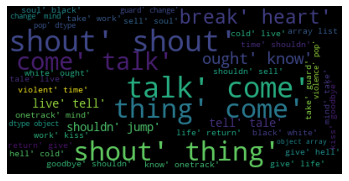

In [544]:
all=[]
print("for all songs which user hear  ")
for i in f :
  all.append(data[f ][1])

wc = wordcloud.WordCloud( background_color='black',    max_words=60 ,     max_font_size=35  )
wc = wc.generate(str( all  ))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [545]:
ff=recommended_songs.index

for all songs which recommended  


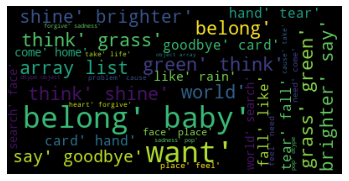

In [546]:
all=[]
print("for all songs which recommended  ")
for i in ff :
  all.append(data[ff ][1])

wc = wordcloud.WordCloud( background_color='black',    max_words=60 ,     max_font_size=35  )
wc = wc.generate(str( all  ))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [553]:
print("recommend genre    ||     listen genre"  )
print("________________________")
for i in range(5):
  print(data[ff[i],3] ,"     ||     ", data[f[i],3] )

recommend genre    ||     listen genre
________________________
pop      ||      pop
pop      ||      pop
pop      ||      pop
country      ||      country
rock      ||      country


In [554]:
print("topics")
print("recommend topics     ||     listen topics"  )
print("________________________")
for i in range(5):
  print(data[ff[i],2] ,"     ||     ", data[f[i],2] )

topics
recommend topics     ||     listen topics
________________________
sadness      ||      world/life
sadness      ||      violence
obscene      ||      violence
violence      ||      violence
world/life      ||      violence
